# Introduction
Earlier on in Part I, we removed empty rows based on subsets of certain seemingly important columns, e.g., age, BMI, gender, etc. 

In Part II,  we performed EDA to develop a bit of intuition behind our data. 

In Part III, we dummified categorical data and prepared the training data for modelling in Part IV. In Part IV, we trained a model for a very challenging problem - extreme data imbalance, i.e. 10/90 proportion for death and survival respectively.

Our models' performance <em>sucked</em>, there's definitely room for improvement. 

Let's take a step back. What if we decide to fill in the blanks, engineer extra features, and redo the machine learning?

In this part, we perform advanced feature engineering. This will be informed by a bit of research, domain expertise, and creative thinking. 

We won't be able to fully cover all of the feature engineering, but we definitely will have performance gains after this. 

We hope that this part can inspire you to think about your machine learning campaigns in the future.

### Step 1: Read about the APACHE system in ICU
If you're a healthcare professional, this is a term familiar to you. For the rest of us in the non-medical industry, it's time to read up on a few things:
1. APACHE II: https://en.wikipedia.org/wiki/APACHE_II
2. APACHE III: https://journal.chestnet.org/article/S0012-3692(16)52804-9/fulltext
3. APACHE IV: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6786733/

With a bit of domain knowledge in mind, we shall now proceed with working with the data. 

Technically, we should have done these readings earlier but we figured that it'd be more useful to demonstrate the power of domain knowledge of modeling in this section.

### Step 2: Import the following libraries for now
- pandas as pd
- numpy as np

In [ ]:
# Step 2: Import pandas

### Step 3: Read the original data.csv as a DataFrame
Let's read the raw data that we originally downloaded, instead of the cleaned one from Part I. 

Sanity check: we should have 91,713 rows x 186 columns. 

In [ ]:
# Step 3: Read your original data.csv as a DataFrame

### Step 4: Impute missing values in age, height, weight
Instead of discarding empty rows, let's try imputing the missing values in the age, height, and weight column with the median.

There are a few ways of replacing the NA in the column with the median:
1. Using .fillna method of a DataFrame to fill in the median
2. Using sklearn's SimpleImpute to impute the median in the DataFrame

<strong>Hint: Google "pandas fillna with median" for Approach 1</strong>

<strong>Hint 2: Google "imputation sklearn" for Approach 2</strong>

In [ ]:
# Step 4: Replace the NA in the columns with median

### Step 5: Fill the missing values in the BMI column with your own calculation
BMI is slightly correlated with patient death, so let's use the BMI calculation to calculate the values in the bmi column.

\begin{equation*}
BMI = \frac{weight} {(height)^2}
\end{equation*}

where weight is in kg, and height is in meters.

There are a few ways to do it but as long as your entire BMI column is filled with values, it is ok.

In [ ]:
# Step 5: Replace the empty values in the bmi column with the values that you have imputed

In [ ]:
# [Optional] Step 5: Do this if you're stuck
# declare an empty list

# do a for loop for index, row in your DataFrame's iterrows()

    # create a variable that is the row's weight divided by the square of the row's height squared
    
    # append the empty list with your calculated BMI
    
    
# assign the list as the DataFrame's bmi column


### Step 6: Bin the BMIs into different categories and save it in a column named "weightClass"
Now that we have the BMI values for all of the patients, we will now bin these values into different categories. 

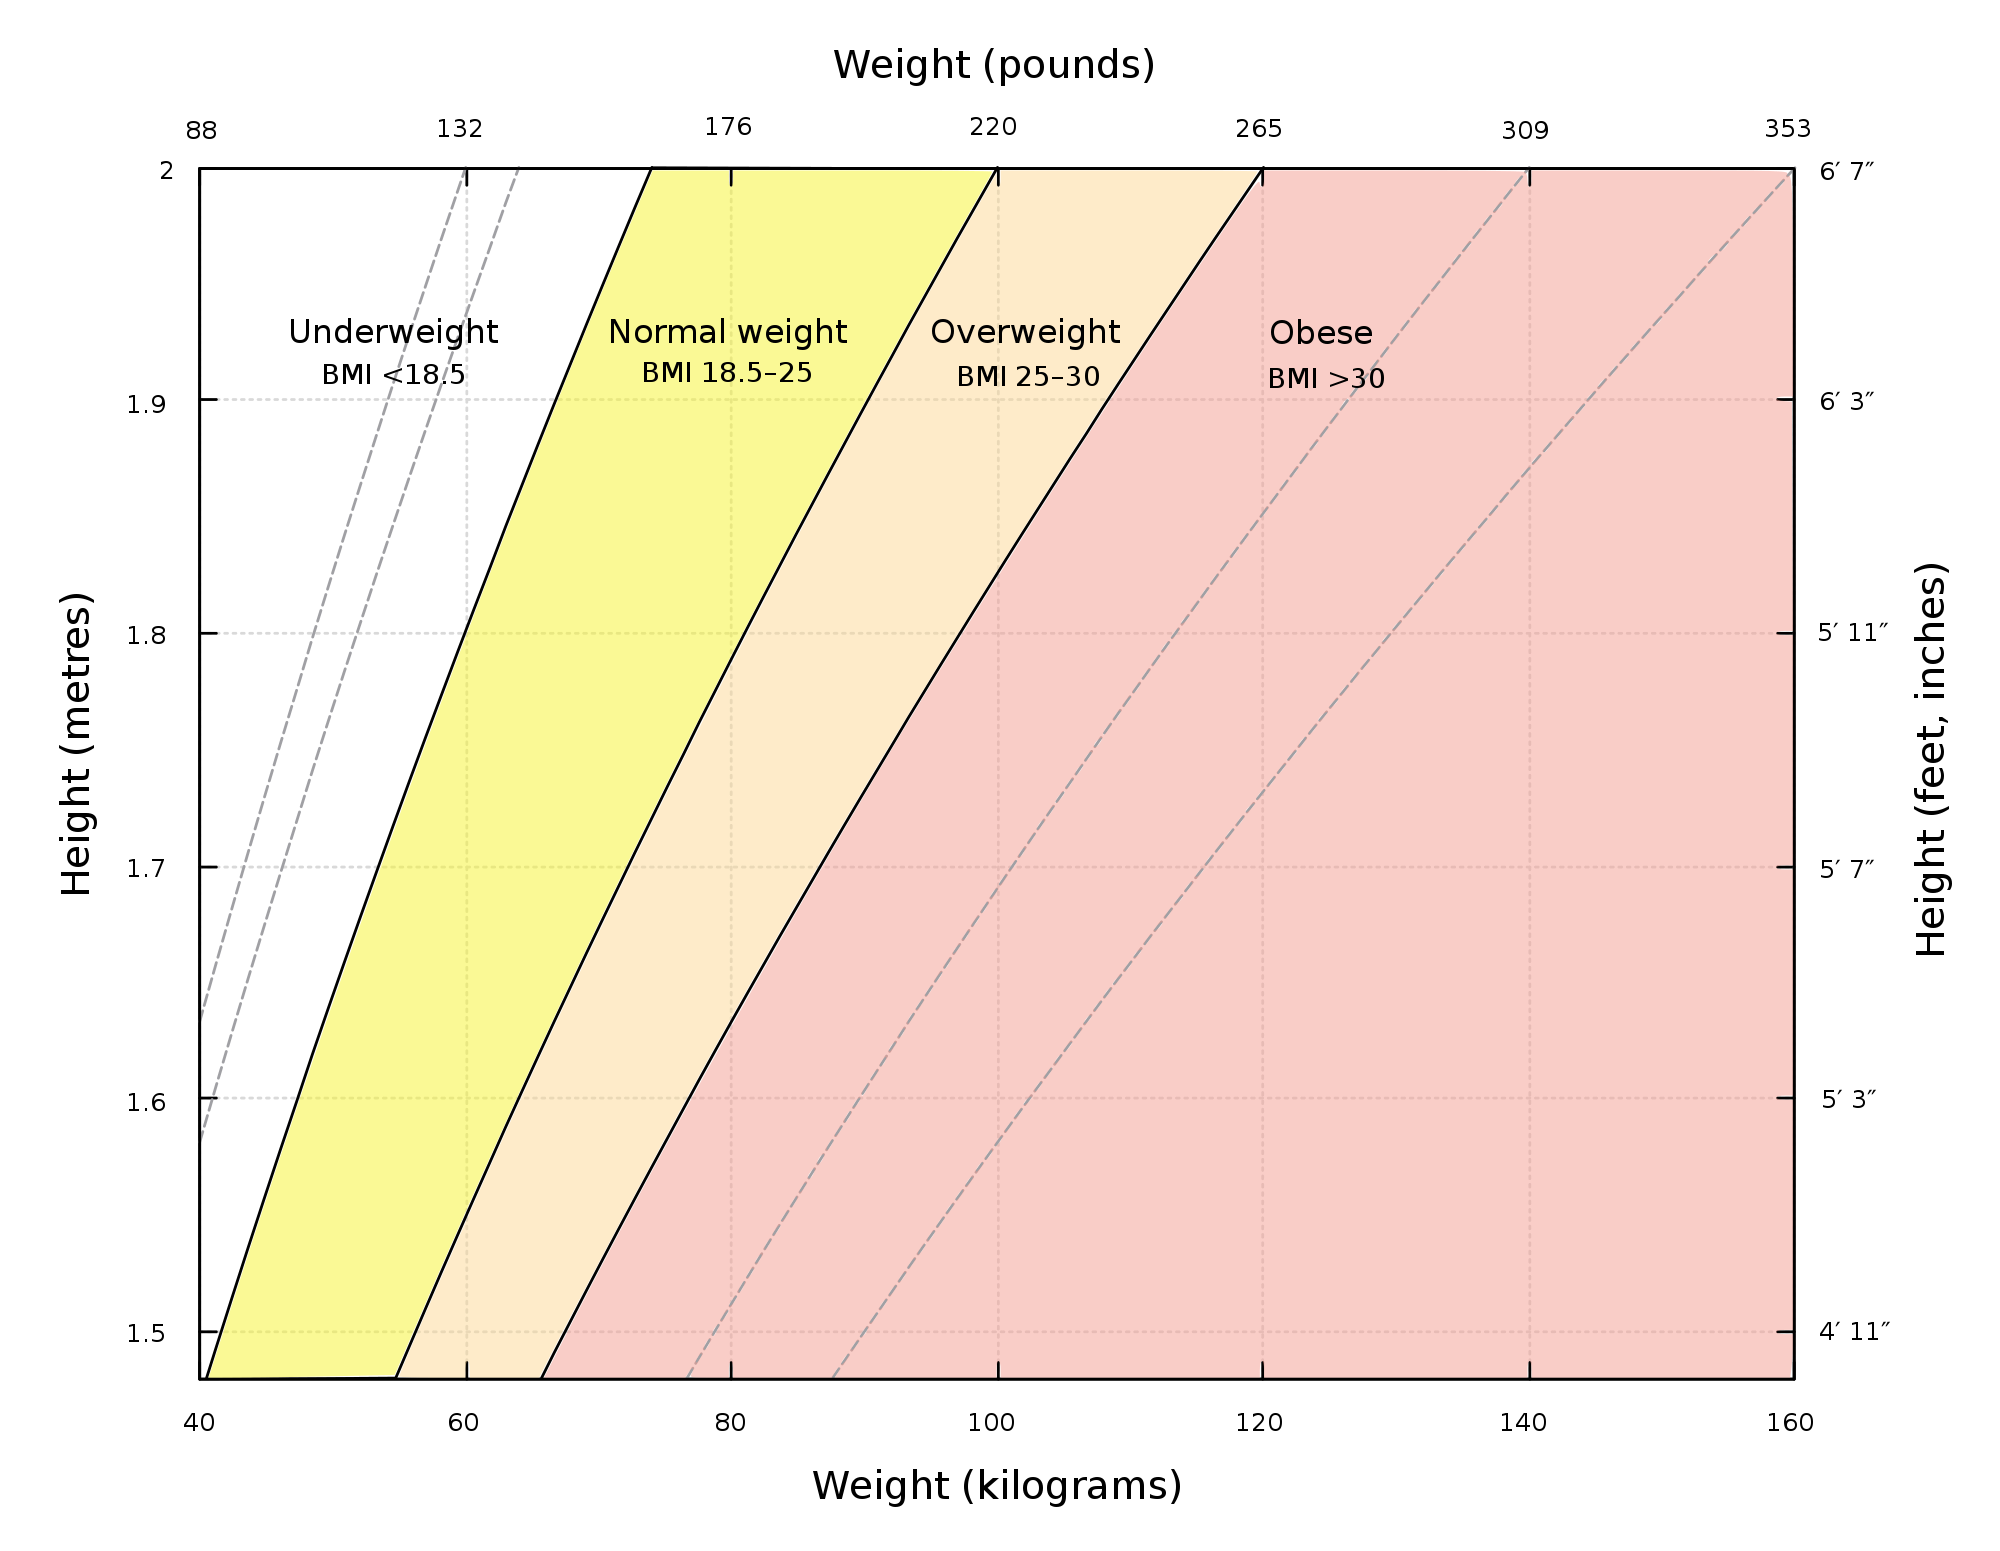

BMI values fall within defined categories and we will bin them according to these specifications:
1. weight < 15 = 'very_severely_underweight'
2. weight >= 15 and weight < 16 = 'severely_underweight
3. weight >= 16 and weight < 18.5 = 'underweight'
4. weight >= 18.5 and weight < 25 = 'healthy_weight
5. weight >= 25 and weight < 30 = 'overweight'
6. weight >= 30 and weight < 35 = 'obese_class_I'
7. weight >= 35 and weight < 40 = 'obese_class_II'
8. weight >= 40 = 'obese_class_III"

There are a few ways to do it:
1. create a list, use a for loop to check the BMI and append the categorical value, and create a new column
2. use pandas built in method <strong>cut</strong> the values

<strong>Hint: Google 'continuous variable into categorical pandas' for Approach 2</strong>

In [ ]:
# Step 6: Bin your BMI into categories

### Step 7: Create a new column 'isUrgent' based on 'pre_icu_los_days'
Based on 'pre_icu_los_days', we can guess that the shorter amount of time spent between hospital and ICU ward, the more urgent the case is. 

As such, we can create a new column that suggests whether the case is urgent or otherwise. We define a case to be urgent if the patient spends less than 2 hours for 'pre_icu_los_days'.

If 'pre_icu_los_days' is less than 2/24 hours, then isUrgent = 1, else 0.

In [ ]:
### Step 7: Create the isUrgent column

### Step 8: Replace -1 and NA in 'apache_4a_icu_death_prob' and 'apache_4a_icu_hospital_death_prob' with 0
We will replace the -1 and NA values in the two columns with 0. Turns out -1 is used when there is no probability of death. 

<strong>Hint: Google 'replace value in column pandas'</strong>

<strong>Hint 2: Use np.nan as NA</strong>

In [ ]:
# Step 8: Replace -1 and NA in apache_4a_icu/hospital_death_prob with 0

### Step 9: Create a column 'max_apache_4a_death_prob' with columns from Step 8
We will then take the two apache_4a_icu/hospital_death_prob and take the maximum value between the two, saving the value in a new column named 'max_apache_4a_death_prob'.

<strong>Hint: Google "maximum of two columns pandas"</strong>

In [ ]:
# Step 9: Create max_apache_4a_death_prob

### Step 10: Drop columns that have >10% missing values
With all these new features, let's remove any columns with more than 10% missing values. 

This is a rather strict criteria, but it will improve the overall dataset instead of how we did it in the previous part.

<strong>Hint: Google "drop column according to NAN percentage for dataframe"</strong>

<strong>Hint 2: When you find the solution, make sure you tweak it! Otherwise, you might be removing too few columns</strong>

In [ ]:
# Step 10: Declare a new variable with a DataFrame that contains only >90% of values in its column

Sanity check:

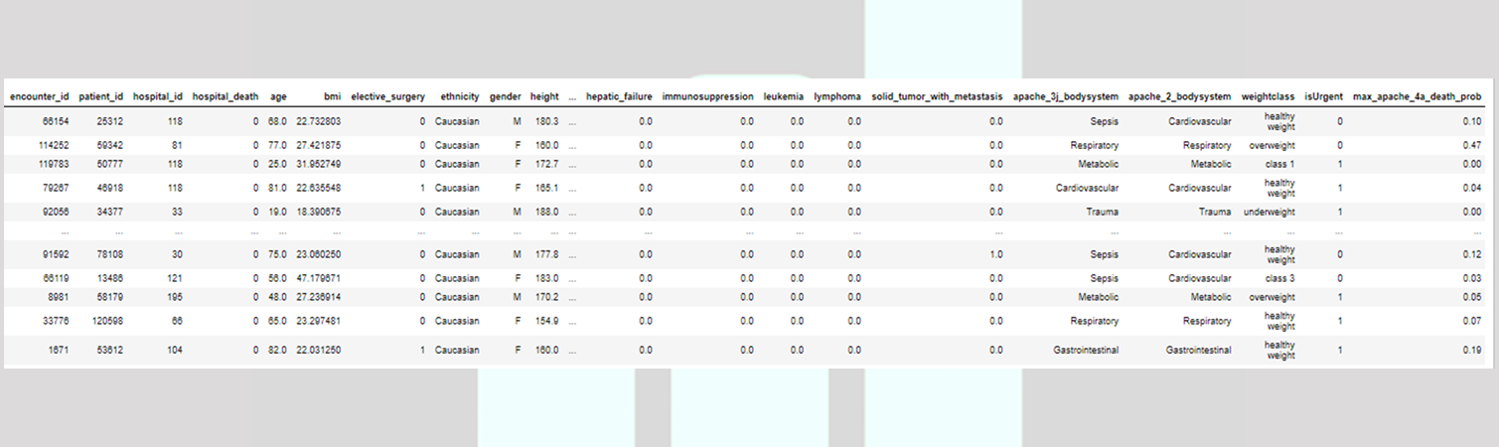

After you're done with trimming the columns, you should have a DataFrame with <strong>91,713 rows and 86 columns</strong>.

### Step 11: Drop any rows containing NA
Remember in Part I when we did a drop NA? That resulted in a DataFrame with measly 25 rows. 

In this case, do the same and don't worry - we'll end up with a much larger DataFrame now that we've ditched columns that contain a large number of missing values

In [ ]:
# Step 11: Drop NA and save the new DataFrame in a variable

### Step 12: Get dummies of categorical data
We can now get dummies from more columns, namely:
1. ethnicity
2. gender
3. icu_stay_type
4. icu_admit_source
5. icu_type
6. apache_2_bodysystem
7. apache_3j_bodysystem
8. weightclass

You know the drill - it's not too different from what we did in Part III, except there are a few more new categorical columns to dummify. 

Don't forget to drop the first column as well!

In [ ]:
# Step 12: Dummify the columns that contain categorical values

### Step 13: Drop the unused columns and categorical columns
Now that we've finished dummifying the columns containing categorical values, we can then drop these columns. 

On top of the columns mentioned in Step 12, drop:
1. encounter_id
2. patient_id
3. hospital_id

In [ ]:
# Step 13: Drop the columns in Step 12 and the three columns mentioned above

### Step 14: Combine all of the DataFrames together
Declare a variable, and concatenate all of the DataFrames containing the dummified values and the DataFrame from Step 13.

You should anticipate 120 columns in this final DataFrame.

In [ ]:
# Step 14: Combine the DataFrames together

### Step 15: Repeat the machine learning modelling steps from Part IV, Steps 1, 3-9
Now that we're done with preparing a more engineered dataset, we can perform machine modelling. Don't forget:
1. Import all of your libraries
2. Prepare your independent and dependent variables
3. Split the variables into train and test set
4. Train the machine learning model
5. Assess the model performances

Prepare to be surprised, as your model improves from 0.5 to somewhere above 0.6 - usually you'll hover between 0.6 to 0.65, depending on the model you use.

In [ ]:
# Step 15: Train a classifier model that can predict ICU survival

# The end
And that's the end! To recap, you've:
1. Downloaded an unknown and dirty dataset
2. Performed naive preliminary cleaning
3. Explored the features through visualization
4. Engineered new features through dummification
5. Trained a machine learning model to classify ICU survival
6. Improved the machine learning model through advanced feature engineering informed by domain expertise

<strong>With this, you've improved your classifier's performance from an AUC score of 0.5 to somewhere around 0.65 if you do it properly.

The significance of this improvement can be better observed in the confusion matrix. More specifically, with model predicts 4.5x more true positives than random guessing which is highly crucial in a clinical setting. </strong>

This was a rather hard modelling to do, given how dirty the data was and how imbalanced the dependent variables were. However, with brilliant feature engineering, you managed to improve your model.

That is the true essence of being a data scientist, to be able to to tease out new relationships between features for a more meaning modelling. 

There's still ample room to engineer new features to improve the classification performance of the model but that is an iterative process.

Whatever you learn here is but a tip of the iceberg, and launchpad for bigger and better things to come. Come join us in our Telegram community over at https://bit.ly/UpLevelSG and our Facebook page at https://fb.com/UpLevelSG